## Import Libraries

In [1]:
import pandas as pd                       # For data manipulation and tabular analysis #dataframe-tools
import numpy as np                        # For numerical operations and array handling #numerical-computing
import seaborn as sns                     # For statistical visualizations #plot-style
import matplotlib.pyplot as plt           # For creating charts and plots #plot-core
import scipy.stats as stats               # Statistical functions and probability distributions #stat-functions
import time                               # Time measurement and program timing #timing-control

from scipy.stats import pearsonr          # Calculates Pearson correlation between two numeric variables #correlation-test

from scipy.stats import skew              # Measures data skewness #skewness-check
from scipy.stats import spearmanr         # Computes Spearman rank correlation #correlation-rank
from scipy.stats import chi2_contingency  # Performs chi-square test for independence #chi2-test
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Measures multicollinearity #vif-check
from statsmodels.tools.tools import add_constant                            # Adds intercept term for regression models #regression-setup

___
## Load Dataset

In [18]:
data = pd.read_csv("dataset/P2_FinPro_Final_Record.csv")

In [19]:
data

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,mobile_phone,work_phone,phone,email,family_size,months_balance,status,begin_month,credit_approval,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,0,C,-15,No,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-1,C,-15,No,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-2,C,-15,No,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-3,C,-15,No,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-4,C,-15,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-9,0,-13,No,1
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-10,2,-13,No,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-11,1,-13,No,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-12,0,-13,No,1


In [20]:
categorical_columns = ['gender',
                       'car',
                       'realty',
                       'occupation',
                       'education',
                       'marital_status',
                       'house_type',
                       'status',
                       'credit_approval']

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in gender: ['M' 'F']
Unique values in car: ['Y' 'N']
Unique values in realty: ['Y' 'N']
Unique values in occupation: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
Unique values in education: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in marital_status: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
Unique values in house_type: ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
Unique values in status: ['C' '1' '0' 'X' '5' '4' '3' '2']
Unique values in credit_approval: ['No' 'Yes']


In [21]:
data['target'].value_counts()

target
0    668145
1    109570
Name: count, dtype: int64

In [22]:
data['credit_approval'].value_counts()

credit_approval
Yes    668145
No     109570
Name: count, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               777715 non-null  int64  
 1   gender           777715 non-null  object 
 2   car              777715 non-null  object 
 3   realty           777715 non-null  object 
 4   child_number     777715 non-null  int64  
 5   income           777715 non-null  float64
 6   occupation       777715 non-null  object 
 7   education        777715 non-null  object 
 8   marital_status   777715 non-null  object 
 9   house_type       777715 non-null  object 
 10  days_birth       777715 non-null  int64  
 11  days_employed    777715 non-null  int64  
 12  mobile_phone     777715 non-null  int64  
 13  work_phone       777715 non-null  int64  
 14  phone            777715 non-null  int64  
 15  email            777715 non-null  int64  
 16  family_size      777715 non-null  floa

___

## EDA 4. Employment & Occupation

### EDA 4.1 Are Applicants From Certain Occupations More Likely To Default?

Text(0, 0.5, 'Count')

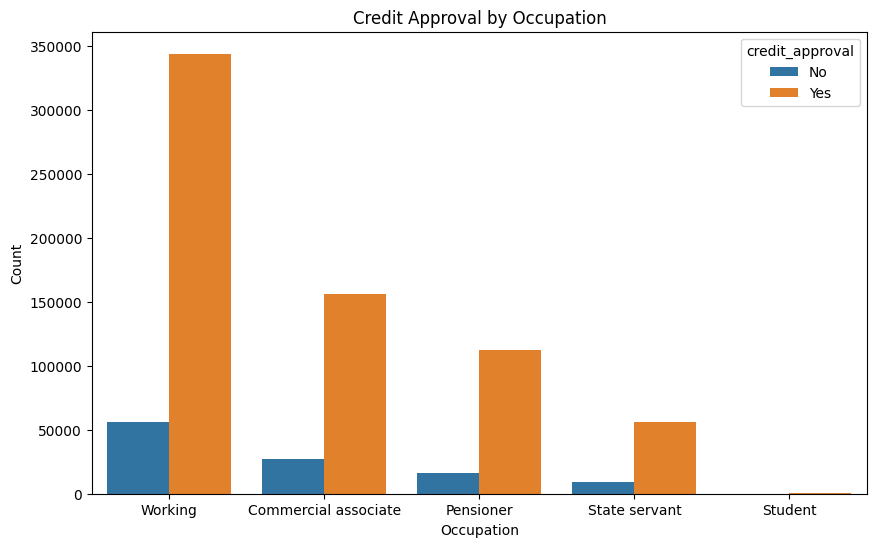

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='occupation', hue='credit_approval')
plt.title('Credit Approval by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')

Insight:

- Working professionals dominate both application and approval counts, indicating strong trust from lenders.
- Commercial associates and pensioners also receive a high number of approvals, possibly due to stable income or predictable financial behavior.
- Students and state servants show lower approval volumes, which could reflect limited financial history or stricter assessment criteria.
- This occupational segmentation suggests that credit policies may favor career stability and income regularity.

<br>

- Pekerja profesional  menjadi kelompok terbesar baik dalam pengajuan maupun persetujuan penerimaan kredit, menunjukkan tingkat kepercayaan tinggi dari pemberi pinjaman.
- Rekan komersial dan pensiunan juga mendapat banyak persetujuan, kemungkinan karena penghasilan yang stabil dan riwayat keuangan yang konsisten.
- Mahasiswa dan pegawai negeri memiliki jumlah persetujuan yang lebih rendah, bisa jadi karena riwayat finansial terbatas atau kriteria evaluasi yang lebih ketat.
- Segmentasi berdasarkan pekerjaan ini mengindikasikan bahwa kebijakan kredit cenderung mengutamakan stabilitas karier dan kestabilan pendapatan.

___
### EDA 4.2 Is There a Relationship Between 'years_employed' and 'income' or 'target'?

In [51]:
# Convert days_employed to years as a standalone object
years_employed = data['days_employed'].abs() / 365

# Convert credit_approval to numeric as an object
credit_approval_numeric = data['credit_approval'].map({'Yes': 1, 'No': 0})

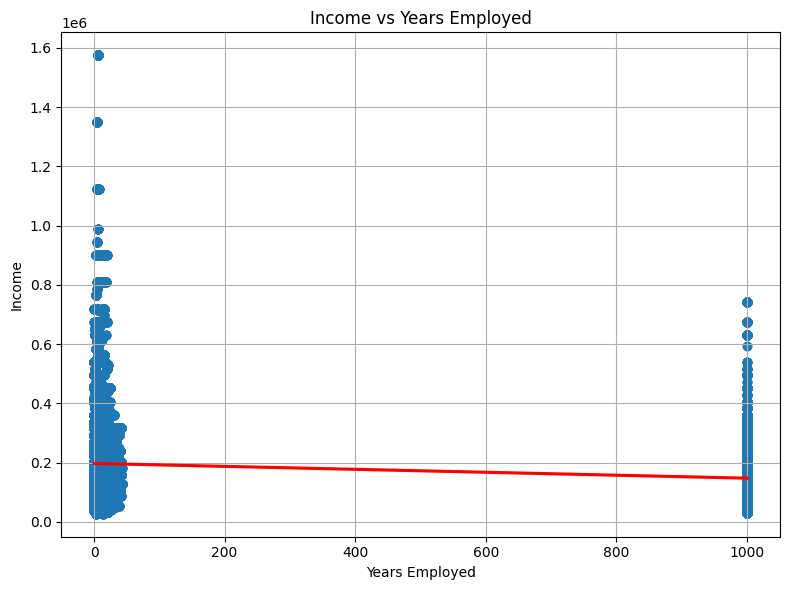

In [52]:
plt.figure(figsize=(8, 6))
sns.regplot(x=years_employed, y=data['income'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Income vs Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

- The plot reveals many applicants with extreme values like 1000 and 0 for years employed, which likely indicate missing or placeholder codes in the dataset. Upon further review, it turns out that the record showing a 1000-year employment duration was a data entry error, as the applicant is actually a retiree. This outlier will be capped to 0.
- Most income values are concentrated below 400,000, with a few outliers reaching over 1.5 million, suggesting income variability regardless of employment duration.
- The red regression line shows a near-flat trend, hinting at a weak or no correlation between years employed and income.
- This indicates that income may not be linearly tied to how long someone has worked — possibly influenced more by role, industry, or other features not shown here.

<br>

- Grafik menunjukkan banyak pelamar dengan nilai ekstrem seperti 1000 dan 0 untuk lama bekerja, yang kemungkinan merupakan kode khusus atau nilai yang hilang dalam data. Setelah ditelaah lebih jauh, ternyata yang bekerja selama 1000 tahun merupakan data yang salah dalam penginputan, karena customer yang mengajukan merupakan seorang pensiunan. Untuk outlier data ini akan dicapping ke 0.
- Mayoritas nilai pendapatan terkonsentrasi di bawah 400.000, dengan beberapa outlier yang melebihi 1,5 juta, menunjukkan variasi penghasilan terlepas dari durasi kerja.
- Garis regresi merah memperlihatkan tren yang hampir datar, mengindikasikan korelasi lemah atau tidak ada antara lama bekerja dan penghasilan.
- Hal ini menyiratkan bahwa pendapatan mungkin tidak selalu berkaitan secara linear dengan masa kerja—kemungkinan lebih dipengaruhi oleh jenis pekerjaan, industri, atau fitur lainnya

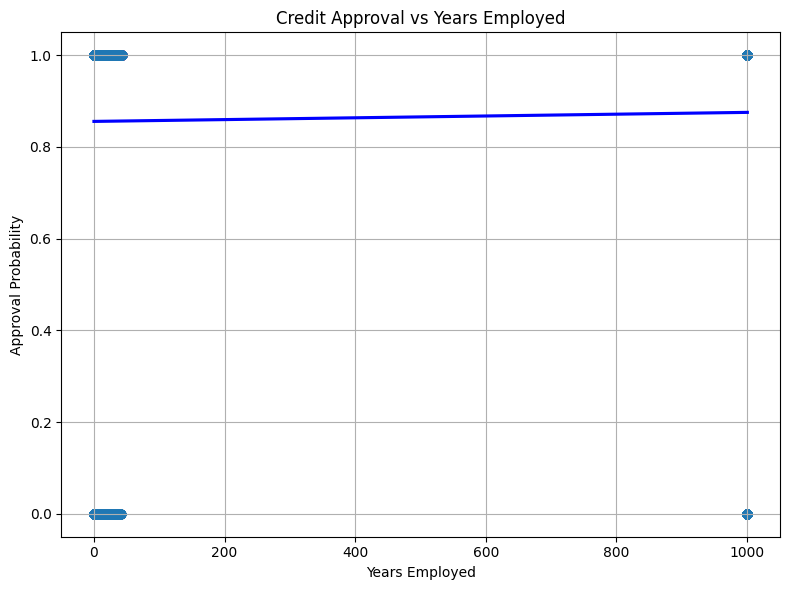

In [57]:
credit_approval_numeric = data['credit_approval']

plt.figure(figsize=(8, 6))
sns.regplot(
    x=years_employed,
    y=credit_approval_numeric,
    logistic=False,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'blue'}
)
plt.title('Credit Approval vs Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Approval Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

- The chart shows that applicants with both very short and extremely long employment durations tend to have similar approval probabilities, clustered around 0.8, indicating employment length may not be a strong predictor of credit approval.
- The horizontal blue line reinforces that the approval rate stays nearly constant, regardless of whether someone has worked 1 year or 1000 years.
- This suggests lenders might rely more on other variables—such as income level, occupation, or credit history—when making decisions.
- It also points to potential data encoding issues, especially with unrealistic values like "1000 years", which may reflect placeholder or missing data entries.

<br>

- Grafik menunjukkan bahwa pelamar dengan durasi kerja yang sangat pendek maupun sangat panjang memiliki probabilitas persetujuan yang serupa, yaitu sekitar 0.8, menandakan bahwa lama bekerja mungkin bukan faktor utama dalam persetujuan kredit.
- Garis biru horizontal menegaskan bahwa tingkat persetujuan tetap hampir konstan, terlepas dari apakah seseorang telah bekerja selama 1 tahun atau 1000 tahun.
- Hal ini menyiratkan bahwa pihak pemberi pinjaman kemungkinan lebih mempertimbangkan variabel lain—seperti tingkat pendapatan, jenis pekerjaan, atau riwayat kredit—dalam pengambilan keputusan.
- Ini juga mengindikasikan kemungkinan adanya masalah pengkodean data, terutama dengan nilai tidak realistis seperti “1000 tahun” yang bisa jadi merupakan placeholder atau data yang hilang.


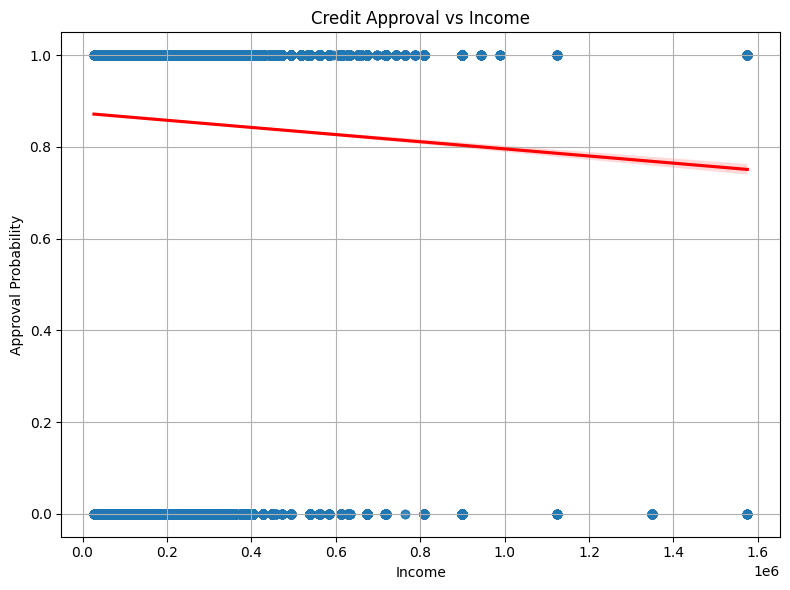

In [54]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=data,
    x='income',
    y='credit_approval',
    logistic=False,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Credit Approval vs Income')
plt.xlabel('Income')
plt.ylabel('Approval Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

No relationship.

___
## EDA 5. Contactability & Data Completeness

### EDA 5.1 How Many Customers Provide a Mobile Phone, Work Phone, or Email?

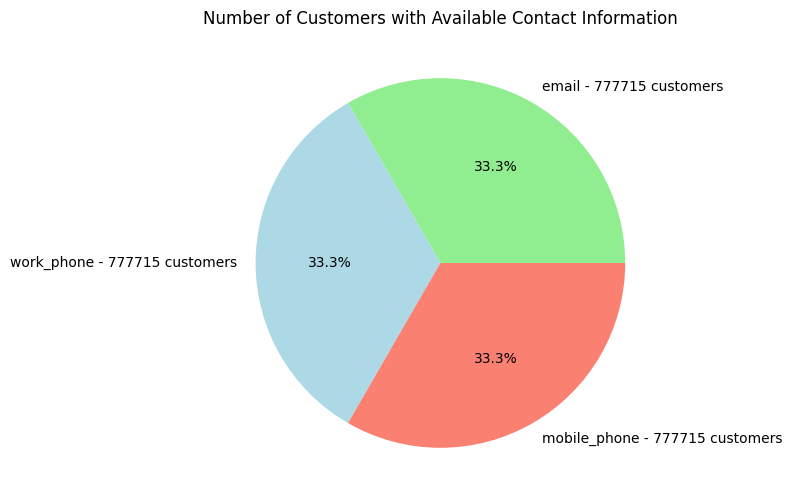

In [17]:
contact_cols = ['email', 'work_phone', 'mobile_phone']
data[contact_cols] = data[contact_cols].notnull().astype(int)  # assume null = not available
contact_counts = data[contact_cols].sum()

# Create full labels with counts
labels = [f"{idx} - {int(val)} customers" for idx, val in contact_counts.items()]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(contact_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'])
plt.title('Number of Customers with Available Contact Information')
plt.show()

Insight:

Everyone who wants to apply for credit fills out their personal information, including email, mobile phone, and work phone.

Semua orang yang ingin mengajukan kredit, mengisi informasi tentang email, mobile_phone dan work_phone masing-masing.

___
## EDA 6. Financial Behavior & Transaction History

### EDA 6.1 What is the distribution of months_balance (if it refers to account history)?

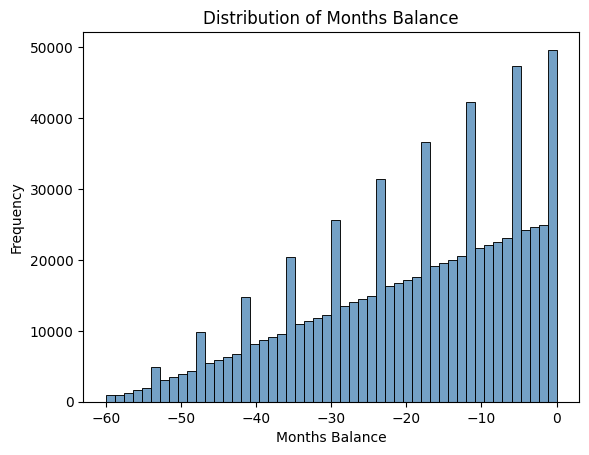

In [35]:
sns.histplot(data=data, x='months_balance', bins=50, color='steelblue')
plt.title('Distribution of Months Balance')
plt.xlabel('Months Balance')
plt.ylabel('Frequency')
plt.show()

Insight:

The fewest transactions occurred in the earliest period, around five years ago, and have steadily increased up to the present month (0).

Transaksi paling sedikit ada pada transaksi terlama, yaitu dilakukan sejak 5 tahun yang lalu, dan terus bertambah sampai menuju ke bulan saat ini (0). 

___
### EDA 6.2 Does begin_month provide insight into credit recency or tenure? / Does begin_months have an impact for credit_approval

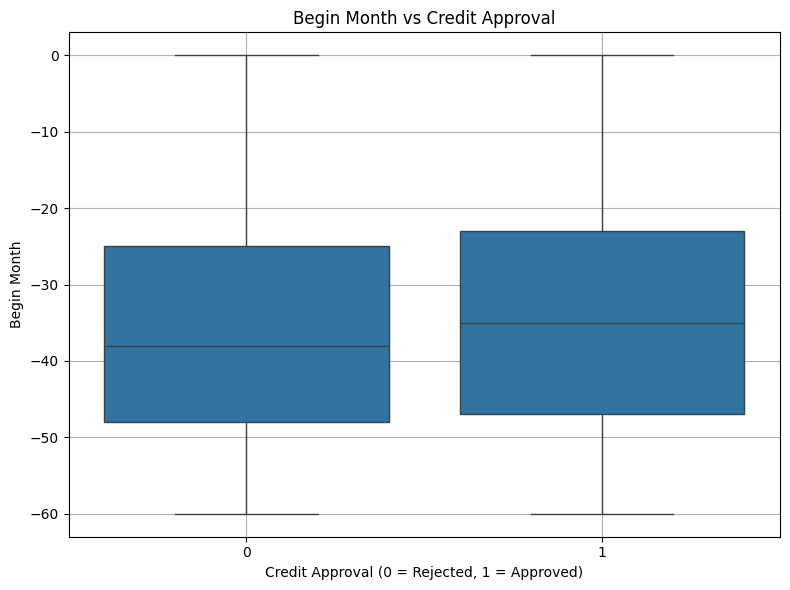

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['credit_approval'], y=data['begin_month'])
plt.title('Begin Month vs Credit Approval')
plt.xlabel('Credit Approval (0 = Rejected, 1 = Approved)')
plt.ylabel('Begin Month')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

- Both approved (1) and rejected (0) credit applications show a similar distribution of Begin Month, with medians near –40, suggesting this feature alone doesn't significantly influence the approval decision.
- The spread between quartiles and whiskers for both groups looks nearly identical, indicating no major temporal bias between applicants who were approved versus rejected.
- This uniformity implies that credit decisions are not strongly affected by when the account was initiated, and lenders likely prioritize other attributes like financial behavior, income level, or job status.
- Using Begin Month as a standalone predictor may have low impact in a credit scoring model unless paired with other time-related variables.

<br>

- Baik aplikasi kredit yang disetujui (1) maupun yang ditolak (0) menunjukkan distribusi Begin Month yang mirip, dengan median di sekitar –40, menandakan fitur ini sendiri tidak terlalu memengaruhi hasil persetujuan.
- Rentang antar-kuartil dan whiskers dari kedua kategori tampak hampir identik, menunjukkan tidak ada bias waktu yang mencolok antara pemohon yang disetujui dan yang ditolak.
- Pola ini mengisyaratkan bahwa keputusan kredit tidak terlalu dipengaruhi oleh waktu pembukaan akun, dan pihak pemberi pinjaman mungkin lebih mengutamakan atribut lain seperti perilaku finansial, tingkat penghasilan, atau status pekerjaan.
- Menggunakan Begin Month sebagai prediktor tunggal kemungkinan memiliki daya prediksi yang rendah, kecuali dikombinasikan dengan variabel waktu lainnya.

___
### EDA 6.3 Do longer account histories correlate with approval or reduced risk?

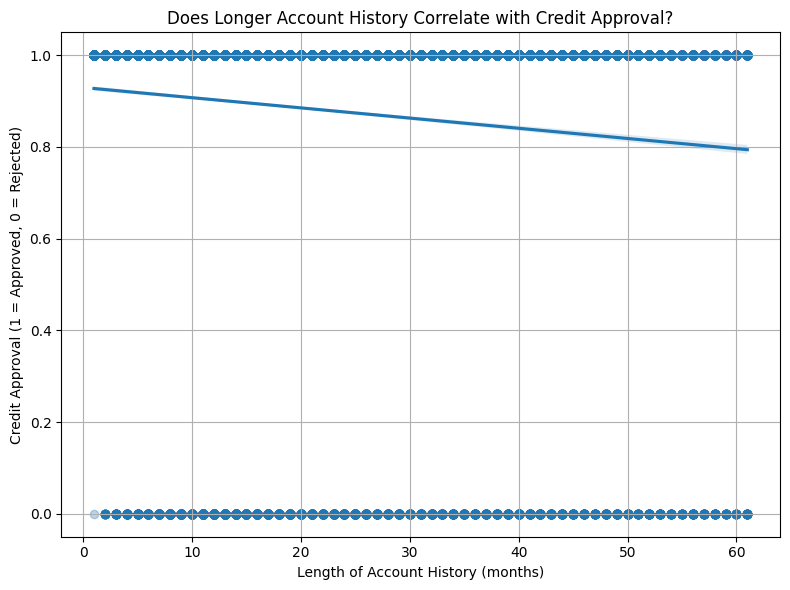

In [49]:
# Step 1: Calculate account history length
account_length = data.groupby('id')['months_balance'].count().reset_index()
account_length.columns = ['id', 'account_history_length']

# Step 2: Use majority approval signal per ID
approval_status = data.groupby('id')['credit_approval'].agg(lambda x: x.mode()[0]).reset_index()

# Step 3: Merge datasets
merged = account_length.merge(approval_status, on='id', how='inner')

# Step 4: Plot regression
plt.figure(figsize=(8, 6))
sns.regplot(
    data=merged,
    x='account_history_length',
    y='credit_approval',
    scatter_kws={'alpha': 0.3}
)
plt.title('Does Longer Account History Correlate with Credit Approval?')
plt.xlabel('Length of Account History (months)')
plt.ylabel('Credit Approval (1 = Approved, 0 = Rejected)')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

- The plot reveals two horizontal clusters: one at y = 1 (approved) and one at y = 0 (rejected), showing how credit decisions are distributed across different account history lengths.
- Contrary to expectations, the trend line shows a slight negative slope, suggesting that longer account histories are not associated with higher approval likelihood—in fact, approval probability may slightly decrease as account age increases.
- This pattern could indicate:
- Applicants with newer accounts may reflect fresh financial activity or recent qualifications for credit.
- Longer account holders might be associated with legacy issues (e.g. past delinquencies) that aren’t visible from duration alone.
- It highlights that account tenure isn't a strong standalone predictor of creditworthiness, and other factors like income consistency, debt-to-income ratio, or repayment history likely play bigger roles.

<br>

- Grafik menunjukkan dua gugus horizontal: satu di y = 1 (disetujui) dan satu di y = 0 (ditolak), menampilkan distribusi keputusan kredit berdasarkan panjang riwayat akun.
- Berlawanan dengan dugaan, garis tren menunjukkan kemiringan negatif ringan, yang berarti bahwa semakin panjang riwayat akun, kemungkinan persetujuan justru sedikit menurun.
- Pola ini mungkin disebabkan oleh:
- Pemohon dengan akun baru mencerminkan aktivitas keuangan yang segar atau baru memenuhi syarat kredit.
- Pemegang akun lama mungkin terkait dengan masalah lama (misalnya tunggakan masa lalu) yang tidak terlihat hanya dari lama akun.
- Ini menandakan bahwa durasi akun bukan indikator kuat untuk kelayakan kredit, dan variabel lain seperti stabilitas pendapatan, rasio utang, atau riwayat pembayaran lebih menentukan.


___
## EDA 7. Anomalies & Outliers

### EDA 7.1

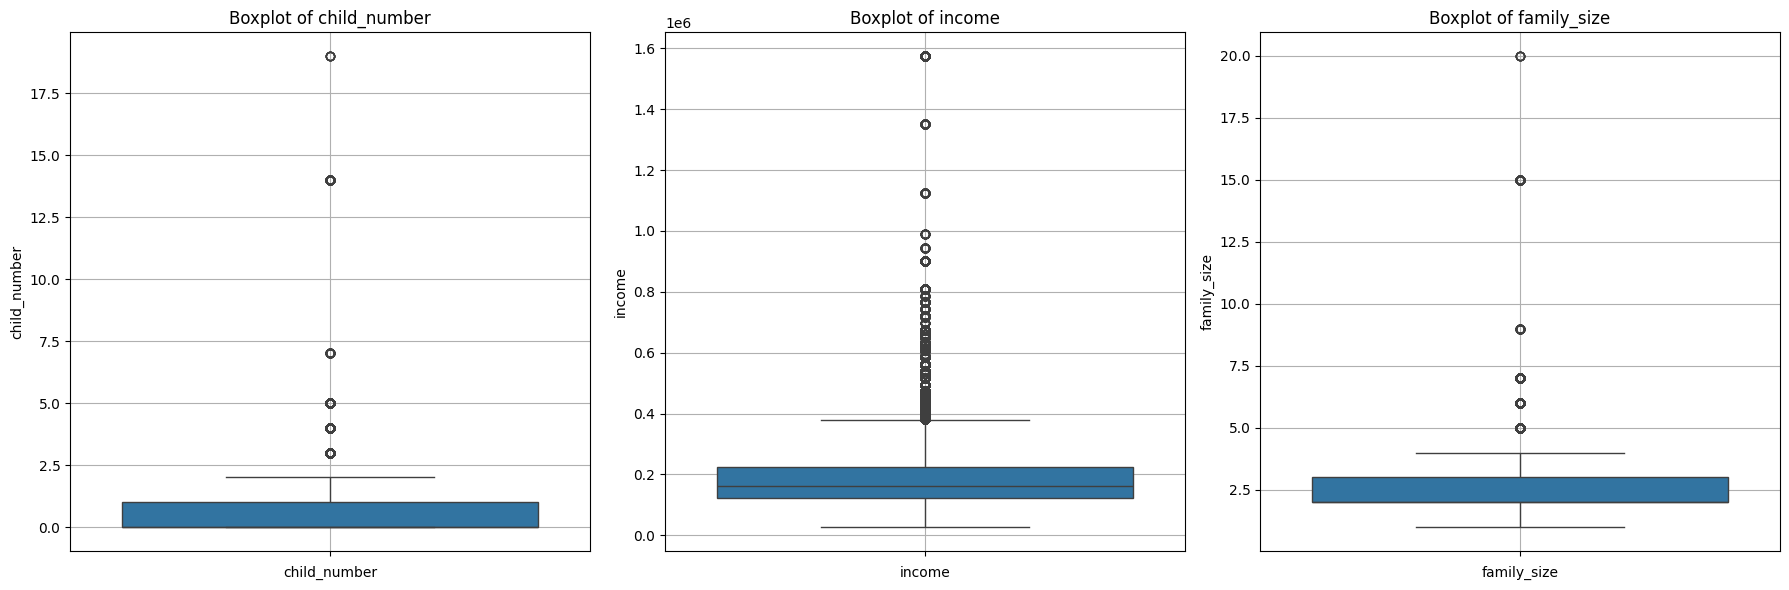

In [50]:
features = ['child_number', 'income', 'family_size']

# Buat plot berjejer ke samping
fig, axes = plt.subplots(1, len(features), figsize=(18, 6))  # ukuran diperbesar

for i, feature in enumerate(features):
    sns.boxplot(y=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Insight:

1. Child Number
- Mayoritas pemohon tidak memiliki anak — terlihat dari konsentrasi data di angka 0.
- Terdapat outlier ekstrem hingga 18 anak, kemungkinan entri tidak realistis atau kasus khusus.
- Distribusi sangat miring ke bawah dan bisa memengaruhi analisis jika tidak ditangani — misalnya dengan winsorizing atau log transformation.
2. Income
- Penghasilan pemohon terkonsentrasi di kisaran 100 ribu – 300 ribu, dengan median sekitar 200 ribu.
- Terdapat outlier yang signifikan hingga 1.6 juta — bisa jadi pemohon dengan profil finansial tinggi.
- Fitur ini berpotensi penting, namun outlier perlu dipertimbangkan untuk mencegah distorsi saat modeling.
3. Family Size
- Umumnya pemohon memiliki keluarga kecil (2–4 anggota).
- Ada outlier dengan ukuran keluarga hingga 20 orang, yang patut ditinjau apakah valid atau hasil input keliru.
- Ukuran keluarga bisa digunakan untuk menilai beban finansial, terutama bila dikaitkan dengan penghasilan.

___
### EDA 7.2 Do extreme income values skew the distribution? Should they be capped or log-transformed?

In [ ]:
income_skew = skew(data['income'].dropna())
print(f"Skewness of income: {income_skew:.4f}")

Skewness of income: 2.5776


Yes, it's very skewed, but we’re not applying any data capping because those values represent the customers themselves.

___
## EDA 8. Relationships Between Variables

### EDA 8.1 Which variables are most strongly correlated with the target or credit approval?

In [ ]:
# Separate numeric columns
numeric_cols = data.select_dtypes(include='number')

# Locally map the target column
target = data['credit_approval'].map({'Yes': 1, 'No': 0})

# Calculate Spearman correlation and p-value
spearman_results = []

for col in numeric_cols:
    corr, pval = spearmanr(data[col], target, nan_policy='omit')
    spearman_results.append((col, corr, pval))

# Save results to a DataFrame
spearman_df = pd.DataFrame(spearman_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
spearman_df = spearman_df.sort_values(by='Spearman Correlation', ascending=False)
print(spearman_df)

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_11340\2090470277.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = spearmanr(data[col], target, nan_policy='omit')


           Feature  Spearman Correlation        p-value
11     begin_month              0.046932   0.000000e+00
10  months_balance              0.018263   2.286963e-58
7            phone              0.008894   4.391256e-15
6       work_phone              0.001237   2.752842e-01
4    days_employed              0.000230   8.389664e-01
9      family_size             -0.006159   5.578557e-08
8            email             -0.011388   9.817997e-24
0               id             -0.011854   1.400169e-25
2           income             -0.015275   2.297872e-41
1     child_number             -0.016658   7.323117e-49
3       days_birth             -0.032482  1.470893e-180
12          target             -1.000000   0.000000e+00
5     mobile_phone                   NaN            NaN


Insight:

None of the numerical features show a strong correlation with approval outcomes, but some may still contribute meaningfully when combined within a more complex predictive model.

Tidak ada fitur numerik yang menunjukkan korelasi kuat dengan hasil persetujuan, tapi beberapa bisa tetap berkontribusi bila digabungkan dalam model prediktif yang kompleks.

In [ ]:
# Define Cramér's V calculation function
def cramers_v(col1, col2):
    contingency = pd.crosstab(col1, col2)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    r, k = contingency.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Select all categorical columns except the target
categorical_cols = data.select_dtypes(include='object').columns.drop('credit_approval')
cramers_results = []

# Calculate Cramér's V for each categorical feature
for col in categorical_cols:
    try:
        score = cramers_v(data[col], data['credit_approval'])
        cramers_results.append((col, round(score, 3)))
    except:
        pass  # skip columns that cannot be processed

# Display the results
cramers_df = pd.DataFrame(cramers_results, columns=['Feature', "Cramér's V"])
cramers_df = cramers_df.sort_values(by="Cramér's V", ascending=False)
print(cramers_df)

          Feature  Cramér's V
7          status       0.321
2          realty       0.031
4       education       0.027
5  marital_status       0.024
0          gender       0.022
3      occupation       0.021
6      house_type       0.017
1             car       0.012


Insight:

Only 'status' show statistically meaningful associations. The rest may be useful for segmentation but are not strong enough to be used as standalone predictors.

Hanya 'status' yang menunjukkan keterkaitan bermakna secara statistik. Sisanya mungkin berguna secara segmentasi tetapi tidak cukup kuat untuk digunakan sebagai prediktor tunggal.

___
### EDA 8.2 Is there multicollinearity that could affect model reliability later on?

In [ ]:
# Select only numeric features for VIF calculation
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['target'])
X = add_constant(numerical_features)  # Add intercept column

vif_scores = pd.DataFrame()
vif_scores['Feature'] = X.columns
vif_scores['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_scores.sort_values(by='VIF', ascending=False))

           Feature           VIF
5     mobile_phone  15026.822470
1     child_number      5.029649
9      family_size      4.924435
3       days_birth      1.759963
4    days_employed      1.697911
11     begin_month      1.650425
10  months_balance      1.641183
6       work_phone      1.208879
7            phone      1.120839
2           income      1.047278
8            email      1.024853
0               id      1.012373


Insight:

- mobile_phone has an extremely high VIF of 15,026, indicating perfect multicollinearity—likely due to it being a constant or near-constant variable. It should be excluded from modeling.
- child_number and family_size both show elevated VIFs (~5–6), suggesting strong overlap or redundancy. These features may carry similar information and could be considered for dimensionality reduction or transformation.
- The remaining features — such as income, days_employed, begin_month, and others — have VIFs well below 2, implying no serious multicollinearity and are safe to use in predictive modeling.
- id likely serves as a unique identifier and should not be treated as a predictive feature.
Address mobile_phone immediately due to its extreme collinearity, and further investigate the relationship between child_number and family_size to avoid overlapping signals.

<br>

- mobile_phone memiliki nilai VIF sangat tinggi yaitu 15.026, menandakan multikolinearitas sempurna—kemungkinan karena nilainya konstan. Fitur ini sebaiknya dikeluarkan dari model.
- child_number dan family_size menunjukkan VIF tinggi (~5–6), yang berarti ada tumpang tindih informasi atau redundansi. Keduanya dapat dipertimbangkan untuk reduksi dimensi atau transformasi.
- Fitur lain seperti income, days_employed, begin_month, dan lainnya memiliki VIF rendah (di bawah 2), artinya tidak ada multikolinearitas serius dan aman digunakan dalam modeling.
- id kemungkinan hanyalah penanda unik dan tidak relevan sebagai prediktor.
Prioritaskan penghapusan mobile_phone, lalu kaji hubungan antara child_number dan family_size agar tidak terjadi duplikasi informasi dalam model.

___